# Available Pre-Computed Features

The Allen Institute also has many more precomputed features. Many of them give access to more information on the electrophysiology, morphology, and metadata on the cells available in the Allen. We will demonstrate how to plug in these features that are available in order to plot your metrics. 

In [1]:
#Import all the necessary packages and initalize an instance of the cache
import pandas as pd
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
import matplotlib.pyplot as plt

ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('Packages succesfully downloaded.')

Packages succesfully downloaded.


Below we have created a pandas dataframe from the electrophysiology data and metadata of our mouse cells and set the row indices to be the `id` column. 

In [2]:
mouse_df = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.MOUSE])).set_index('id')
ephys_df = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
mouse_ephys_df = mouse_df.join(ephys_df)
mouse_ephys_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,...,14.738000,1.391268,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,...,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036
485909730,positive,"[8881.0, 953.839501299405, 7768.22695782726]",Mus musculus,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,...,2.888133,1.520193,-54.031254,-57.385419,-77.750005,3.042933,3.517684,3.274181,-101.000000,-76.928391
323865917,positive,"[8125.0, 904.841803028986, 7819.69986630448]",Mus musculus,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,...,3.467847,1.317042,-57.281254,-56.895833,-70.218751,2.974194,3.156117,2.946463,-88.406250,-69.402855


The Allen has many pre-computed features that you might consider comparing across cells. Some of these features include input resistance ('input_resistance_mohm'), Adapation ratio ('adaptation'), Average ISI ('avg_isi'), and many others (you can find a complete glossary <a href = "https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit#heading=h.t0p3wngfkxc1"> here </a>).

We must first select 2 or more cell types that we would like to compare. We can subset our electrophysiology dataframe to compare across transgenic lines, structure layer, and many more  columns. We created two dataframes to compare spiny dendrite types to aspiny dendrite types.

In [3]:
# Define your cell type variables below
cell_type1 = 'spiny'
cell_type2 = 'aspiny'

# Create our dataframes from our cell types
mouse_spiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type'] == cell_type1]
mouse_aspiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type'] == cell_type2]

Now that we have two cell types we would like to compare, we can now use the pre-computed features to plot some our cells' characteristics. Lets use a boxplot. The syntax to access these precomputed features is as follows:
```
plt.boxplot([dataframe_1['pre_computed_feature'],dataframe_2['pre_computed_feature]])
```
Let's start by comparing the input Resistance between our two cell types.

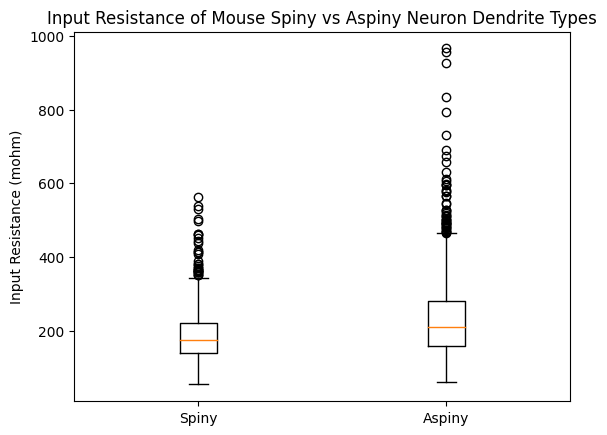

In [4]:
# Select our pre computed feature that we would like to compare 
pre_computed_feature = 'input_resistance_mohm'

# Plot our figure and provide labels
plt.boxplot([mouse_spiny_df[pre_computed_feature], mouse_aspiny_df[pre_computed_feature]])
plt.ylabel('Input Resistance (mohm)')
plt.xticks([1,2], ['Spiny', 'Aspiny'])
plt.title('Input Resistance of Mouse Spiny vs Aspiny Neuron Dendrite Types')

# Show our plot 
plt.show()

**Note**: You cannot plot missing values. Be sure to remove rows that contain missing values before plotting your features. Below is an example of how to compare cell types that contain some missing values in our pre-computed features. 

In [5]:
# Download our Human cells data and combine with our electrophysiology data
human_df = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.HUMAN])).set_index('id')
human_ephys_df = human_df.join(ephys_df)

# Select our cell types
cell_type3 = 'MTG'
cell_type4 = 'MFG'

# Compare two different brain structures 
human_MTG_df = human_ephys_df[human_ephys_df['structure_area_abbrev']== cell_type3]
human_MFG_df = human_ephys_df[human_ephys_df['structure_area_abbrev']== cell_type4]

# Select pre computed feature you would like to compare 
pre_computed_feature2 = 'avg_isi'

# Drop all null values in our column of interest in order to plot
human_MTG_df = human_MTG_df.dropna(subset =[pre_computed_feature2])
human_MFG_df = human_MFG_df.dropna(subset = [pre_computed_feature2])

print('\n Null values dropped.')


 Null values dropped.


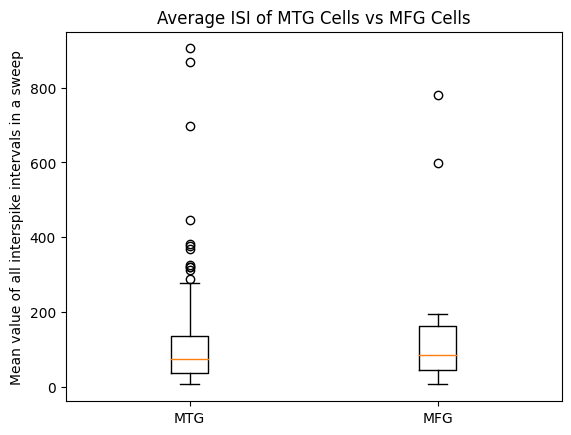

In [6]:
# Plot our figure and provide labels 
plt.boxplot([human_MTG_df[pre_computed_feature2], human_MFG_df[pre_computed_feature2]])
plt.ylabel('Mean value of all interspike intervals in a sweep')
plt.xticks([1,2], ['MTG', 'MFG'])
plt.title('Average ISI of MTG Cells vs MFG Cells')

# Show our plot 
plt.show()

In [10]:
print(f'Number of available pre computed features: {len(ephys_df)}')
ephys_df.head()

Number of available pre computed features: 2333


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


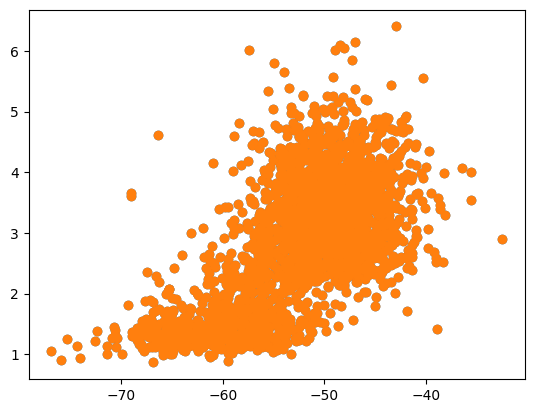

In [14]:
col_1 = 'fast_trough_v_long_square'
col_2 = 'upstroke_downstroke_ratio_long_square'

fast_trough = ephys_df[col_1]
upstroke_downstroke = ephys_df[col_2]

plt.scatter(fast_trough, upstroke_downstroke)

plt.show()

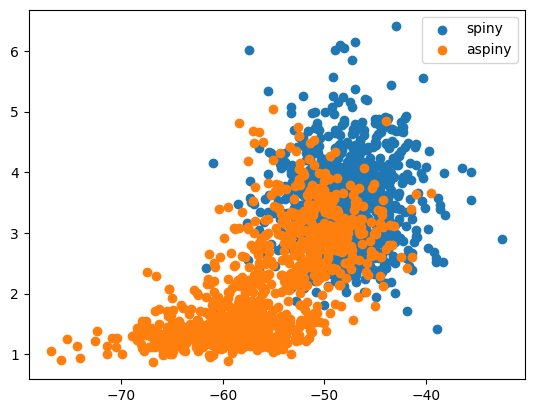

In [19]:
mouse_df = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.MOUSE])).set_index('id')
ephys_df = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
mouse_ephys_df = mouse_df.join(ephys_df)

col_3 = 'dendrite_type'
desired_value1 = 'spiny'
desired_value2 = 'aspiny'

spiny_df = mouse_ephys_df[mouse_ephys_df[col_3]==desired_value1]
aspiny_df = mouse_ephys_df[mouse_ephys_df[col_3]==desired_value2]

plt.scatter(spiny_df[col_1], spiny_df[col_2])
plt.scatter(aspiny_df[col_1], aspiny_df[col_2])
plt.legend([desired_value1,desired_value2])

plt.show()